In [6]:
using Revise, LazySets, BenchmarkTools, Plots

In [ ]:
function split(Z::Zonotope, j::Int)
    @assert 1 <= j <= ngens(Z) "cannot split a zonotope with $(ngens(Z)) generators along index $j"
    c, G = Z.center, Z.generators
    Gj = G[:, j]
    Gj_half = Gj / 2

    c₁ = c - Gj_half
    c₂ = c + Gj_half

    G₁ = copy(G)
    G₁[:, j] = Gj_half
    G₂ = copy(G₁)

    Z₁ = Zonotope(c₁, G₁)
    Z₂ = Zonotope(c₂, G₂)
    return Z₁, Z₂
end

In [16]:
Matrix{Float64}(undef, (1, 2))

1×2 Array{Float64,2}:
 2.26082  -1.18903

In [ ]:
struct Zonotope{N, VN<:AbstractVector{N}, MN<:AbstractMatrix{N}}
    center::N
    generators::MN
end

In [62]:
function _split2(Z::Zonotope{N}, j::Int) where {N}
    @assert 1 <= j <= size(Z, 2) "cannot split a zonotope with $(ngens(Z)) generators along index $j"
    c, G = Z.center, Z.generators

    c₁ = Vector{N}(undef, length(c))
    c₂ = Vector{N}(undef, length(c))
    
    G₁ = copy(G)
    G₂ = copy(G)
    
    @inbounds for i in 1:size(G, 1)
        α = G[i, j] / 2
        c₁[i] = c[i] - α
        c₂[i] = c[i] + α
        G₁[i, j] = α
        G₁[i, j] = α
    end
    
    Z₁ = Zonotope(c₁, G₁)
    Z₂ = Zonotope(c₂, G₂)
    return Z₁, Z₂
end

_split2 (generic function with 2 methods)

In [3]:
Z = rand(Zonotope);

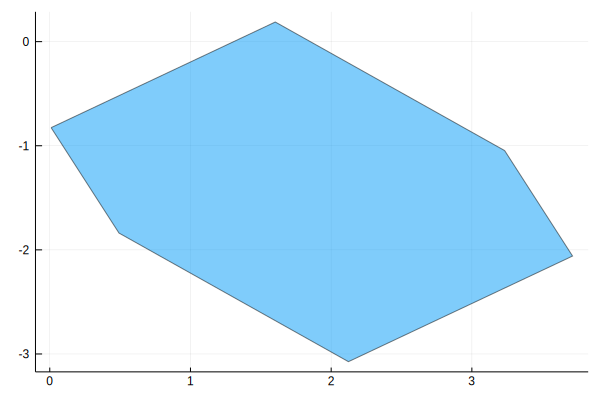

In [7]:
plot(Z)

In [10]:
Z1, Z2 = split(Z, 1)

(Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([2.2608154870873243, -1.1890324029828236], [-0.3982646665324632 0.8152036188190726 0.2413006853410285; -0.25367450660055973 -0.6175459298544886 -0.5064639745357822]), Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([1.4642861540223981, -1.696381416183943], [-0.3982646665324632 0.8152036188190726 0.2413006853410285; -0.25367450660055973 -0.6175459298544886 -0.5064639745357822]))

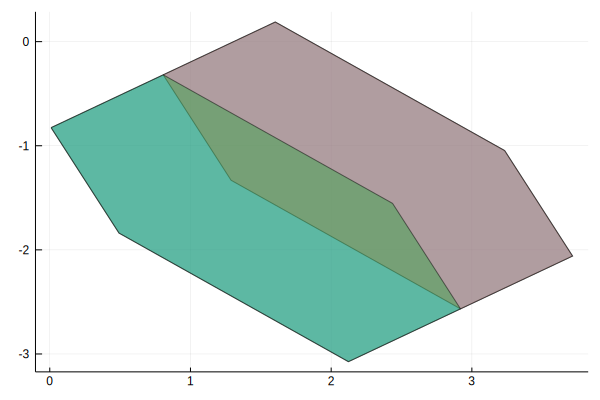

In [11]:
plot!(Z1)
plot!(Z2)

In [18]:
Z1b, Z2b = _split(Z, 1)

(Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([2.2608154870873243, -1.1890324029828236], [-0.3982646665324632 0.8152036188190726 0.2413006853410285; -0.25367450660055973 -0.6175459298544886 -0.5064639745357822]), Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([1.4642861540223981, -1.696381416183943], [-0.3982646665324632 0.8152036188190726 0.2413006853410285; -0.25367450660055973 -0.6175459298544886 -0.5064639745357822]))

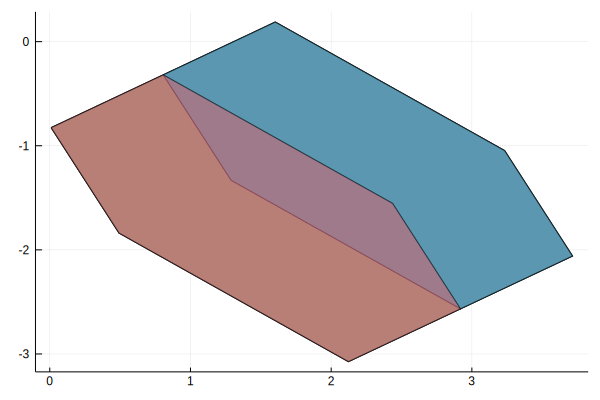

In [19]:
plot!(Z1b)
plot!(Z2b)

In [20]:
@btime split($Z, 1)

  191.321 ns (9 allocations: 736 bytes)


(Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([2.2608154870873243, -1.1890324029828236], [-0.3982646665324632 0.8152036188190726 0.2413006853410285; -0.25367450660055973 -0.6175459298544886 -0.5064639745357822]), Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([1.4642861540223981, -1.696381416183943], [-0.3982646665324632 0.8152036188190726 0.2413006853410285; -0.25367450660055973 -0.6175459298544886 -0.5064639745357822]))

In [39]:
@btime _split2($Z, 1) # without using copy

  123.943 ns (7 allocations: 544 bytes)


(Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([2.2608154870873243, -1.1890324029828236], [-0.3982646665324632 0.8152036188190726 0.2413006853410285; -0.25367450660055973 -0.6175459298544886 -0.5064639745357822]), Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([1.4642861540223981, -1.696381416183943], [-0.7965293330649263 0.8152036188190726 0.2413006853410285; -0.5073490132011195 -0.6175459298544886 -0.5064639745357822]))

In [43]:
@btime _split2($Z, 1) # using copy

  119.057 ns (7 allocations: 544 bytes)


(Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([2.2608154870873243, -1.1890324029828236], [-0.3982646665324632 0.8152036188190726 0.2413006853410285; -0.25367450660055973 -0.6175459298544886 -0.5064639745357822]), Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([1.4642861540223981, -1.696381416183943], [-0.7965293330649263 0.8152036188190726 0.2413006853410285; -0.5073490132011195 -0.6175459298544886 -0.5064639745357822]))

In [38]:
_split2(Z, 1)

(Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([2.2608154870873243, -1.1890324029828236], [-0.3982646665324632 0.8152036188190726 0.2413006853410285; -0.25367450660055973 -0.6175459298544886 -0.5064639745357822]), Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([1.4642861540223981, -1.696381416183943], [-0.7965293330649263 0.8152036188190726 0.2413006853410285; -0.5073490132011195 -0.6175459298544886 -0.5064639745357822]))

In [27]:
a, b = split(Z, 1)

(Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([2.2608154870873243, -1.1890324029828236], [-0.3982646665324632 0.8152036188190726 0.2413006853410285; -0.25367450660055973 -0.6175459298544886 -0.5064639745357822]), Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([1.4642861540223981, -1.696381416183943], [-0.3982646665324632 0.8152036188190726 0.2413006853410285; -0.25367450660055973 -0.6175459298544886 -0.5064639745357822]))

In [28]:
a.center

2-element Array{Float64,1}:
  2.2608154870873243
 -1.1890324029828236

In [29]:
b.center

2-element Array{Float64,1}:
  1.4642861540223981
 -1.696381416183943

In [30]:
c, d = _split(Z, 1)

(Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([2.2608154870873243, -1.1890324029828236], [-0.3982646665324632 0.8152036188190726 0.2413006853410285; -0.25367450660055973 -0.6175459298544886 -0.5064639745357822]), Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([1.4642861540223981, -1.696381416183943], [-0.3982646665324632 0.8152036188190726 0.2413006853410285; -0.25367450660055973 -0.6175459298544886 -0.5064639745357822]))

In [31]:
c.center

2-element Array{Float64,1}:
  2.2608154870873243
 -1.1890324029828236

In [32]:
d.center

2-element Array{Float64,1}:
  1.4642861540223981
 -1.696381416183943

In [33]:
a.generators

2×3 Array{Float64,2}:
 -0.398265   0.815204   0.241301
 -0.253675  -0.617546  -0.506464

In [34]:
b.generators

2×3 Array{Float64,2}:
 -0.398265   0.815204   0.241301
 -0.253675  -0.617546  -0.506464

In [35]:
c.generators

2×3 Array{Float64,2}:
 -0.398265   0.815204   0.241301
 -0.253675  -0.617546  -0.506464

In [36]:
d.generators

2×3 Array{Float64,2}:
 -0.398265   0.815204   0.241301
 -0.253675  -0.617546  -0.506464

In [66]:
Z = rand(Zonotope, dim=10, num_generators=50);

In [67]:
@btime split($Z, 20);

  916.000 ns (9 allocations: 8.84 KiB)


In [68]:
@btime _split2($Z, 20);

  836.606 ns (7 allocations: 8.53 KiB)


In [49]:
899e-9 / 766e-9

1.1736292428198434

In [50]:
using StaticArrays

In [114]:
Z = rand(Zonotope, dim=10, num_generators=20);

In [71]:
@btime split($Z, 3)

  192.538 ns (9 allocations: 832 bytes)


(Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([-0.6715637063010158, -0.63038246376673], [-0.3931276226273011 -0.47571927063498815 … 0.8737343172999755 1.7249547028347327; -1.0840392795808225 -1.749646270457784 … 0.3188570531630708 -0.5200168819022156]), Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([0.4339593946415646, -0.1466792812949053], [-0.3931276226273011 -0.47571927063498815 … 0.8737343172999755 1.7249547028347327; -1.0840392795808225 -1.749646270457784 … 0.3188570531630708 -0.5200168819022156]))

In [76]:
Z.generators

2×6 Array{Float64,2}:
 -0.393128  -0.475719  1.10552   -0.760242  0.873734   1.72495
 -1.08404   -1.74965   0.483703  -0.812114  0.318857  -0.520017

In [79]:
Zc_st = SVector{2}(Z.center)
Zg_st = SMatrix{2, 6}(Z.generators);

In [86]:
SVector{, T}

search: SVector @SVector DenseVector SizedVector StaticVector AbstractVector



```
SVector{S, T}(x::NTuple{S, T})
SVector{S, T}(x1, x2, x3, ...)
```

Construct a statically-sized vector `SVector`. Since this type is immutable, the data must be provided upon construction and cannot be mutated later. Constructors may drop the `T` and `S` parameters if they are inferrable from the input (e.g. `SVector(1,2,3)` constructs an `SVector{3, Int}`).

```
SVector{S}(vec::Vector)
```

Construct a statically-sized vector of length `S` using the data from `vec`. The parameter `S` is mandatory since the length of `vec` is unknown to the compiler (the element type may optionally also be specified).


In [81]:
Zst = Zonotope(Zc_st, Zg_st)

Zonotope{Float64,SArray{Tuple{2},Float64,1,2},SArray{Tuple{2,6},Float64,2,12}}([-0.1188021558297256, -0.38853087253081764], [-0.3931276226273011 -0.47571927063498815 … 0.8737343172999755 1.7249547028347327; -1.0840392795808225 -1.749646270457784 … 0.3188570531630708 -0.5200168819022156])

In [96]:
MVector{2, Float64}(undef)

2-element MArray{Tuple{2},Float64,1,2} with indices SOneTo(2):
 6.9430480711588e-310
 1.1383e-320

In [92]:
MMatrix{2, Float64, 2}(undef)

MethodError: MethodError: no method matching *(::Int64, ::Type{Float64})
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529
  *(!Matched::MutableArithmetics.Zero, ::Any) at /home/mforets/.julia/packages/MutableArithmetics/ZGFsK/src/rewrite.jl:49
  *(::T, !Matched::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:54
  ...

In [102]:
MMatrix{2, 6}(Zst.generators)

2×6 MArray{Tuple{2,6},Float64,2,12} with indices SOneTo(2)×SOneTo(6):
 -0.393128  -0.475719  1.10552   -0.760242  0.873734   1.72495
 -1.08404   -1.74965   0.483703  -0.812114  0.318857  -0.520017

In [83]:
_split3(Zst, 3)

ErrorException: setindex!(::SArray{Tuple{2,6},Float64,2,12}, value, ::Int) is not defined.

In [107]:
function _split3(Z::Zonotope{N, SVector{n, N}, <:SMatrix{n, p, N}}, j::Int) where {N, n, p}
    @assert 1 <= j <= ngens(Z) "cannot split a zonotope with $(ngens(Z)) generators along index $j"
    c, G = Z.center, Z.generators

    c₁ = MVector{n, N}(undef)
    c₂ = MVector{n, N}(undef)
    
    G₁ = MMatrix{n, p}(G)
    G₂ = MMatrix{n, p}(G)

    @inbounds for i in 1:n
        α = G[i, j] / 2
        c₁[i] = c[i] - α
        c₂[i] = c[i] + α
        G₁[i, j] = α
        G₁[i, j] = α
    end
    
    Z₁ = Zonotope(SVector{n}(c₁), SMatrix{n, p}(G₁))
    Z₂ = Zonotope(SVector{n}(c₂), SMatrix{n, p}(G₂))
    return Z₁, Z₂
end

_split3 (generic function with 2 methods)

In [110]:
@btime _split3($Zst, 3)

  13.565 ns (0 allocations: 0 bytes)


(Zonotope{Float64,SArray{Tuple{2},Float64,1,2},SArray{Tuple{2,6},Float64,2,12}}([-0.6715637063010158, -0.63038246376673], [-0.3931276226273011 -0.47571927063498815 … 0.8737343172999755 1.7249547028347327; -1.0840392795808225 -1.749646270457784 … 0.3188570531630708 -0.5200168819022156]), Zonotope{Float64,SArray{Tuple{2},Float64,1,2},SArray{Tuple{2,6},Float64,2,12}}([0.4339593946415646, -0.1466792812949053], [-0.3931276226273011 -0.47571927063498815 … 0.8737343172999755 1.7249547028347327; -1.0840392795808225 -1.749646270457784 … 0.3188570531630708 -0.5200168819022156]))

In [113]:
@btime _split2($Z, 3)

  120.353 ns (7 allocations: 640 bytes)


(Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([-0.6715637063010158, -0.63038246376673], [-0.3931276226273011 -0.47571927063498815 … 0.8737343172999755 1.7249547028347327; -1.0840392795808225 -1.749646270457784 … 0.3188570531630708 -0.5200168819022156]), Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([0.4339593946415646, -0.1466792812949053], [-0.3931276226273011 -0.47571927063498815 … 0.8737343172999755 1.7249547028347327; -1.0840392795808225 -1.749646270457784 … 0.3188570531630708 -0.5200168819022156]))

In [118]:
Z = rand(Zonotope, dim=10, num_generators=40);

@btime split($Z, 20)
@btime _split2($Z, 20)

Zc_st = SVector{10}(Z.center)
Zg_st = SMatrix{10, 40}(Z.generators);
Zst = Zonotope(Zc_st, Zg_st)
@btime _split3($Zst, 20)

  853.319 ns (9 allocations: 7.22 KiB)
  764.333 ns (7 allocations: 6.91 KiB)
  259.137 ns (0 allocations: 0 bytes)


(Zonotope{Float64,SArray{Tuple{10},Float64,1,10},SArray{Tuple{10,40},Float64,2,400}}([-1.4132777071862856, 1.0877036441039296, -0.20543067187739217, 2.4666880347475986, 0.7506960641298065, -0.273532491033142, -0.26681273744212386, 0.7008650171536108, 0.018016179639796126, 0.8575327611516955], [-1.634524694260912 0.955618449593443 … 0.36134978516795246 0.7692741548300117; 0.6164692831666785 1.2452862650892866 … -0.3577327036908993 -1.843983929746041; … ; 0.9912424192898354 0.7096388971628171 … -0.11454592710617333 -0.09198241409713402; -0.2087068200866268 -0.8434426744959838 … -0.5910001784015374 0.49422499726963565]), Zonotope{Float64,SArray{Tuple{10},Float64,1,10},SArray{Tuple{10,40},Float64,2,400}}([-0.6113479006956115, 0.9154224409981726, -1.2774561925308947, 1.1065181045577162, 0.6023257807787171, 0.06820274156661608, 0.7905878397619004, -0.24507327407508483, -0.3484598276298121, 1.1392602231650977], [-1.634524694260912 0.955618449593443 … 0.36134978516795246 0.7692741548300117; 0.

In [122]:
1

1

In [124]:
Zst.center - view(Zst.generators, :, 1)

10-element SArray{Tuple{10},Float64,1,10} with indices SOneTo(10):
  0.6222118903199634
  0.3850937593843726
  0.676157179837275
  0.12973015007919098
  1.7327953435775105
  1.9580880873055628
  0.38837772352642236
  0.4322458766829344
 -1.1564642432848433
  1.2071033122450234

In [128]:
function _split4(Z::Zonotope{N, SVector{n, N}, <:SMatrix{n, p, N}}, j::Int) where {N, n, p}
    @assert 1 <= j <= ngens(Z) "cannot split a zonotope with $(ngens(Z)) generators along index $j"
    c, G = Z.center, Z.generators

    c₁ = c - view(G, :, j)
    c₂ = c + view(G, :, j)

    G₁ = MMatrix{n, p}(G)
    G₂ = MMatrix{n, p}(G)

    @inbounds for i in 1:n
        α = G[i, j] / 2
        G₁[i, j] = α
        G₁[i, j] = α
    end
    
    Z₁ = Zonotope(c₁, SMatrix{n, p}(G₁))
    Z₂ = Zonotope(c₂, SMatrix{n, p}(G₂))
    return Z₁, Z₂
end

_split4 (generic function with 1 method)

In [129]:
Z = rand(Zonotope, dim=10, num_generators=40);

@btime split($Z, 20)
@btime _split2($Z, 20)

Zc_st = SVector{10}(Z.center)
Zg_st = SMatrix{10, 40}(Z.generators);
Zst = Zonotope(Zc_st, Zg_st)
@btime _split3($Zst, 20)
@btime _split4($Zst, 20)

  882.652 ns (9 allocations: 7.22 KiB)
  869.583 ns (7 allocations: 6.91 KiB)
  292.969 ns (0 allocations: 0 bytes)
  290.136 ns (0 allocations: 0 bytes)


(Zonotope{Float64,SArray{Tuple{10},Float64,1,10},SArray{Tuple{10,40},Float64,2,400}}([0.8396244142815961, 1.7566442761715673, 0.10214418276215409, -2.5857661073706706, -2.1523539675275094, 0.746781107313911, 0.5505893619914646, 0.7822309533001686, 1.7318184342946608, -2.676096512067583], [-0.16256792969690972 1.2755227171464036 … -0.6974074016630616 -0.32945799584655383; -2.137058008363168 -1.4291500366474206 … 0.11529028991121176 -0.002481074610032895; … ; 1.1803051525571773 1.2170595309714243 … -1.0681276275171074 1.5161779440118301; -0.8321639221676876 0.7846285314362006 … -1.6522198008633835 1.4973235577229533]), Zonotope{Float64,SArray{Tuple{10},Float64,1,10},SArray{Tuple{10,40},Float64,2,400}}([-1.0538412243067936, 2.9598760285995107, -2.251953644515668, 0.24060208976065356, -0.8378229767110981, -0.6046508956107555, 0.3094413522624316, -0.25185236579755704, 1.8150004135248334, 1.1898144479100559], [-0.16256792969690972 1.2755227171464036 … -0.6974074016630616 -0.32945799584655383

In [131]:
Z = rand(Zonotope, dim=2, num_generators=10);

@btime split($Z, 5)
@btime _split2($Z, 5)

Zc_st = SVector{2}(Z.center)
Zg_st = SMatrix{2, 10}(Z.generators);
Zst = Zonotope(Zc_st, Zg_st)
@btime _split3($Zst, 5)
@btime _split4($Zst, 5)

  202.380 ns (9 allocations: 960 bytes)
  141.847 ns (7 allocations: 768 bytes)
  22.216 ns (0 allocations: 0 bytes)
  22.215 ns (0 allocations: 0 bytes)


(Zonotope{Float64,SArray{Tuple{2},Float64,1,2},SArray{Tuple{2,10},Float64,2,20}}([1.3639924454615209, -0.7897087113218604], [0.4663832904899459 -0.41222930751615755 … -0.6510437493996774 -1.0686211454598191; -1.2533545893868507 -0.897885261791939 … 0.877387344872121 0.4445007985490915]), Zonotope{Float64,SArray{Tuple{2},Float64,1,2},SArray{Tuple{2,10},Float64,2,20}}([-0.7443359404682621, -0.0863041027412968], [0.4663832904899459 -0.41222930751615755 … -0.6510437493996774 -1.0686211454598191; -1.2533545893868507 -0.897885261791939 … 0.877387344872121 0.4445007985490915]))